<a href="https://colab.research.google.com/github/RafaelNovais/MasterAI/blob/master/Salary.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# CT5132 / CT5148 Assignment 2: Periphery

**Summary**: In this assignment, you have to investigate, explain, and implement one or more methods of finding the **periphery** of a dataset. The periphery doesn't have a single definition, so you have some freedom to look at different definitions and approaches.

You are allowed to use any sources and resources you like, including code and documents from the internet, existing libraries, and generative AI methods.

**Due date**: as announced on Canvas.

**Weight**: this assignment is worth 20% of the module.

**Groups**: you may work in a group of 1 (solo), 2, or 3, but you must not work with any student you previously worked with in any assignment in this module or any other module.

If working in a group:
* You must notify the lecturer by email 2 weeks before the due date, cc-ing all students in the group, and state that you have not worked together in any other assignment.
* Students in a group must work together on all aspects -- you cannot split tasks up so that one student doesn't understand how another student's part of the project works.
* All students in the group must submit and the submissions must be identical.
* All communication should cc all group members.

**Resources**:

* You may use code you find on the internet, but you must clearly cite the URL and clearly mark which parts of your solution are from that URL.
* You may use code completion and generative AI methods, such as GitHub Copilot and ChatGPT. When doing so you must clearly document your methodology when using it, eg the system(s) you use, the prompts, how you notice when the AI gets things wrong, how you improve it, etc. You must clearly document which parts of your submission come from generative AI.
* You may discuss with other students/groups, but you may not show your work to them or view their work.

**Interviews**: Post-submission vivas will be used in some cases to give students an opportunity to demonstrate their learning.

**Grading**: A basic solution (one simple method, based on a single source, demonstrated on one dataset, with short explanation) will be enough for a pass grade. For a very high grade, you can add more value by, for example:

* Investigating multiple methods,
* describing your methods correctly,
* implementing and comparing them (results, visualisations, pros and cons),
* on multiple datasets with different properties;
* providing a sophisticated account of the use of generative AI;
* integrating information from multiple sources;
* implementing your methods as Scikit-Learn estimators (NB: for some approaches to the problem there is no "right answer", so we may or may not need to implement `score`),
* with clean code and appropriate documentation and comments;
* with vectorisation where appropriate;
* describing the run-time or computational complexity.

These are examples of how you can add value, not an exhaustive list.

**NB**: some approaches to the problem are based on machine learning, but others are not. This is not a machine learning module, so you are not obliged to choose any machine learning methods.

There is no lower or upper bound on word-count or line-count. However, a high-quality submission with 3 methods and 3 datasets could be done in less than 100 lines and less than 1000 words.

**Submission**: submit an `ipynb` file containing code, results, and explanations. If you need to submit any data files as well, you can submit a `zip` file. Include your name and ID.

**Rafael Novais de Melo -
23113607**

### Problem definition

Given a dataset of points `X` of shape `(n_samples, n_features)`, the **periphery** is a subset of those points which are in some sense "on the border", or "outside the main dataset". The image below shows one possible conception of the periphery. I created it by hand for this dataset. Your job is to investigate methods of doing it automatically for any dataset. Some relevant ideas include the **convex hull**, **anomaly detection**, **outliers**, **bounding box**.

(Why is the periphery interesting? One motivation is when investigating the performance of regression and classification models in **extrapolation**: if we train only on the core, how is performance on the unseen periphery? But this is just motivation: we are not required to investigate extrapolation for this assignment.)

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.base import BaseEstimator

In [ ]:
# Create a random dataset
np.random.seed(1)
X = np.random.rand(30, 2)

# Create labels: 0 => core, 1 => periphery
labels = np.zeros(len(X))
# by hand!
labels[[1, 10, 12, 13, 14, 19, 20]] = 1

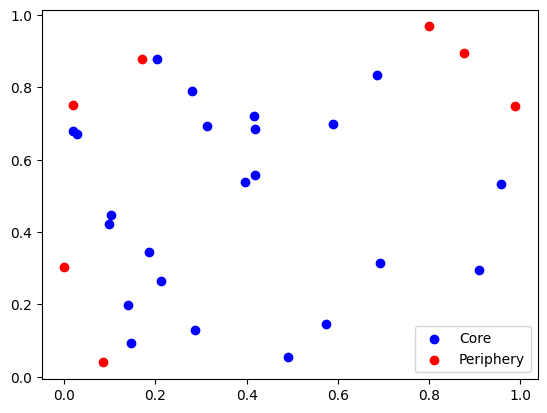

In [ ]:
core = X[labels == 0]
periphery = X[labels == 1]
plt.scatter(core[:, 0], core[:, 1], c='blue', label='Core')
plt.scatter(periphery[:, 0], periphery[:, 1], c='red', label='Periphery')
plt.legend()
plt.show()

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.spatial import ConvexHull
from sklearn.base import BaseEstimator
from sklearn.cluster import DBSCAN
from sklearn.ensemble import IsolationForest
import seaborn as sns

#Read File - https://www.kaggle.com/datasets/willianoliveiragibin/data-jobs-salaries
data = pd.read_csv('/content/drive/MyDrive/Master/salaries.csv')



In [ ]:
data.groupby(['company_location', 'job_title','experience_level' ])[['salary_in_usd']].mean().round(2)


salary_in_usd
company_location job_title                          experience_level               
AD               Data Scientist                     MI                     50745.00
AE               Lead Data Scientist                MI                    115000.00
                 Machine Learning Engineer          SE                     92500.00
AM               Machine Learning Engineer          MI                     50000.00
AR               Data Analyst                       EN                     50000.00
...                                                                             ...
US               Research Scientist                 SE                    191468.71
                 Software Data Engineer             SE                    210000.00
                 Staff Data Scientist               SE                    134500.00
                 Staff Machine Learning Engineer    SE                    185000.00
ZA               Machine Learning Software Engineer MI                     34482.00

[631 rows x 1 columns]

<Axes: xlabel='salary_in_usd', ylabel='company_location'>

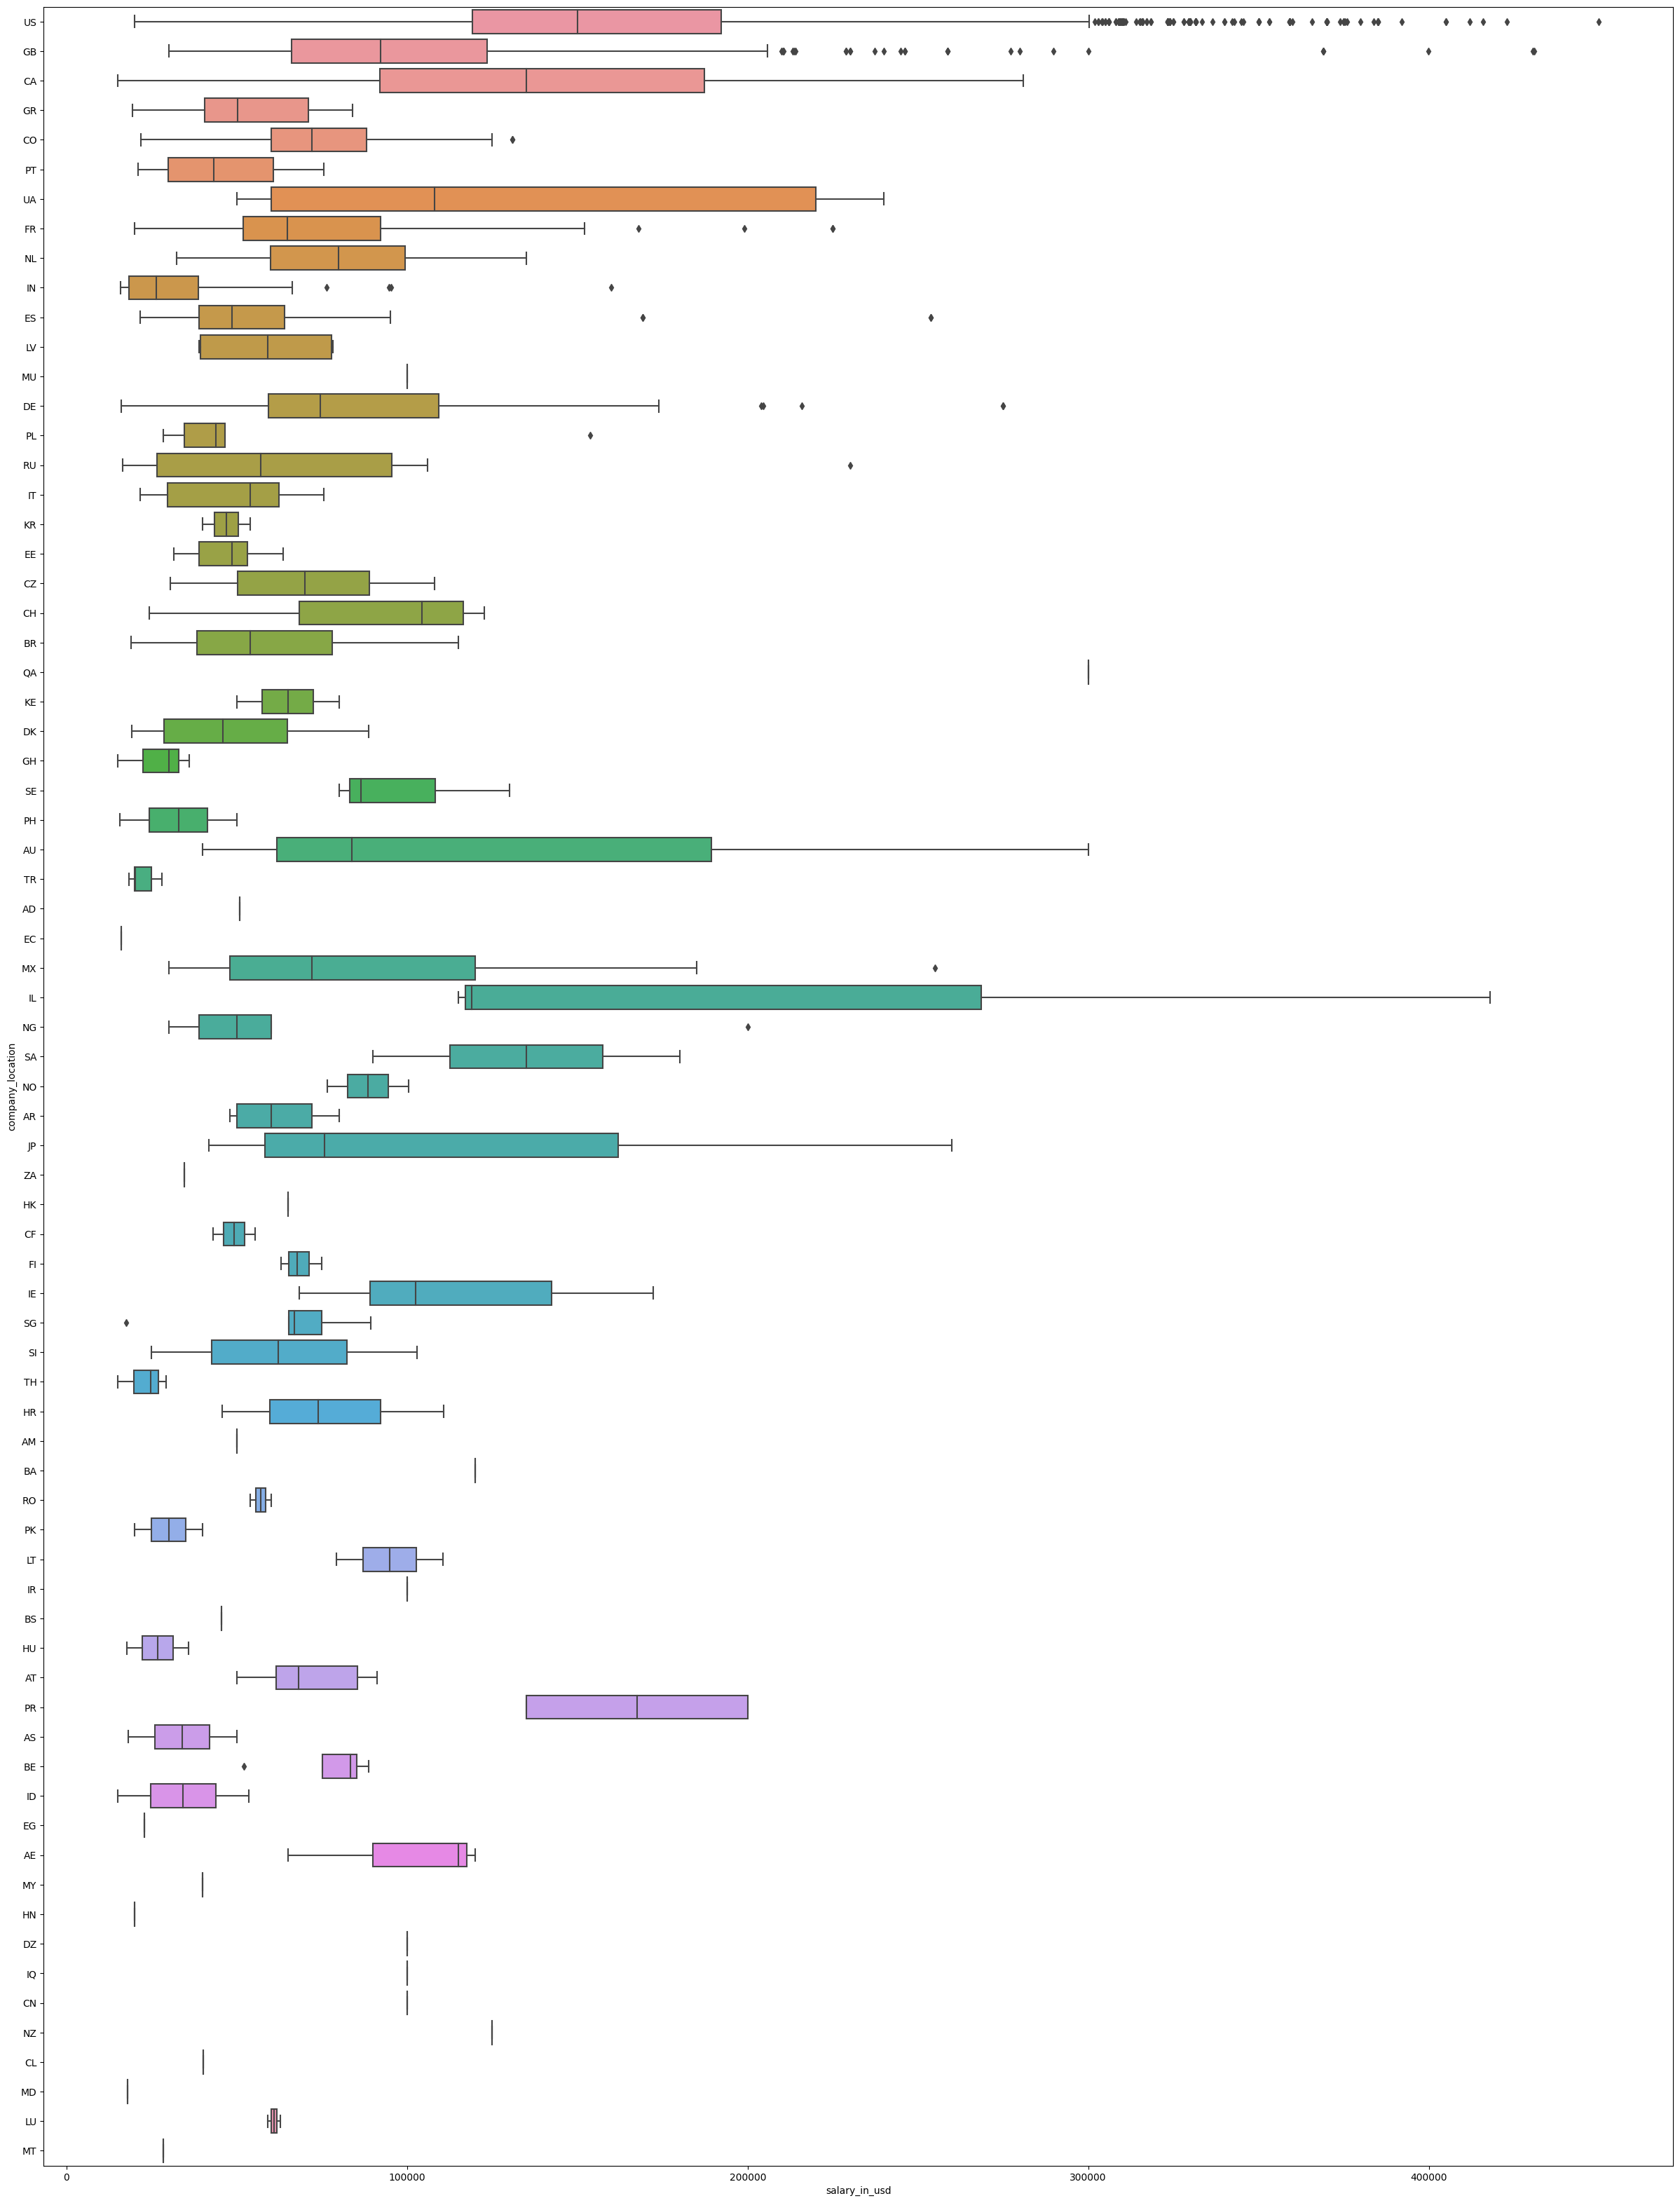

In [ ]:
ax = sns.boxplot(x='salary_in_usd', y='company_location', data=data,orient='h' )
ax.figure.set_size_inches(30,40)
ax
